<a href="https://colab.research.google.com/github/ParineetaDeb/ParineetaDeb/blob/main/OPERATIONS_1_AND_2(LOGISTICS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **OPERATION_01**

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_Record/data/Logistics.csv')

In [ ]:
df

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32060,2024-08-28 20:00:00,48.496665,-104.031158,5.421806,4.394370,0.192421,127.684977,3.607803,0.208643,0.992997,...,-8.835069,0.199377,9.893402,0.966050,0.109571,0.511074,0.953467,0.916745,High Risk,5.506049
32061,2024-08-28 21:00:00,34.670137,-89.893091,10.624778,2.700635,8.736143,84.638889,1.218165,0.472389,0.946031,...,-2.517654,0.673775,0.854378,1.665889,0.530289,0.868418,0.995329,0.808963,High Risk,-1.876938
32062,2024-08-28 22:00:00,42.963338,-82.149873,5.071596,0.485288,7.420200,48.500920,4.999149,0.064366,0.437687,...,29.410878,0.949644,4.480552,0.690990,0.537100,0.896798,0.442299,0.959197,Moderate Risk,9.790219
32063,2024-08-28 23:00:00,32.082410,-70.070154,5.000000,4.759411,0.932050,972.437425,0.505242,0.250949,0.517051,...,-6.951137,0.407377,9.185549,4.462204,0.012896,0.463018,0.999999,0.557340,High Risk,9.956879


In [ ]:
df.columns

Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

In [ ]:
# Imports
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [ ]:
# Fill missing values with 0
df = df.fillna(0,)

In [ ]:
df

,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,...,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,...,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,...,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,...,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,...,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,...,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32060,2024-08-28 20:00:00,48.496665,-104.031158,5.421806,4.394370,0.192421,127.684977,3.607803,0.208643,0.992997,...,-8.835069,0.199377,9.893402,0.966050,0.109571,0.511074,0.953467,0.916745,High Risk,5.506049
32061,2024-08-28 21:00:00,34.670137,-89.893091,10.624778,2.700635,8.736143,84.638889,1.218165,0.472389,0.946031,...,-2.517654,0.673775,0.854378,1.665889,0.530289,0.868418,0.995329,0.808963,High Risk,-1.876938
32062,2024-08-28 22:00:00,42.963338,-82.149873,5.071596,0.485288,7.420200,48.500920,4.999149,0.064366,0.437687,...,29.410878,0.949644,4.480552,0.690990,0.537100,0.896798,0.442299,0.959197,Moderate Risk,9.790219
32063,2024-08-28 23:00:00,32.082410,-70.070154,5.000000,4.759411,0.932050,972.437425,0.505242,0.250949,0.517051,...,-6.951137,0.407377,9.185549,4.462204,0.012896,0.463018,0.999999,0.557340,High Risk,9.956879


In [ ]:
# Preparing Features and Target
X = df.drop(columns=['timestamp', 'risk_classification'])
y = df['risk_classification']

In [ ]:

# Encode target if it is categorical
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [ ]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [ ]:
# Models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

In [ ]:
# Step 6: Train and Evaluate
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:43:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
# Step 7: Show Results
results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))  # Sort by accuracy
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Random Forest: 1.0000
XGBoost: 0.9984
Logistic Regression: 0.7597
SVM: 0.7429
KNN: 0.7218


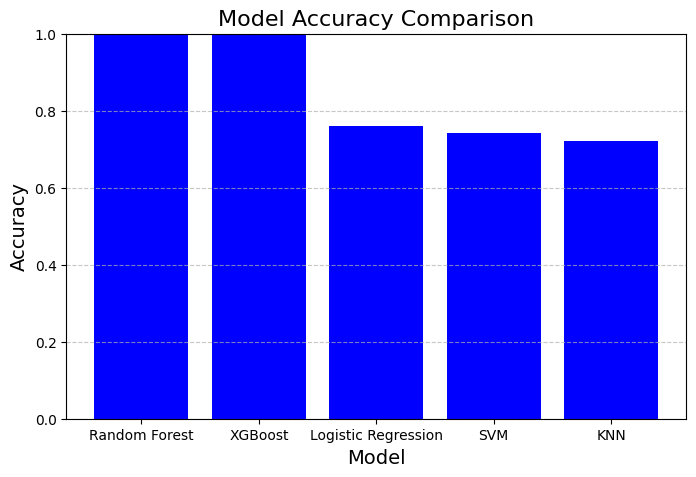

In [ ]:
import matplotlib.pyplot as plt

# Sort results by accuracy
results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))

# Bar Chart
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color='Blue')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)  # Because accuracy is between 0 and 1
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# **OPERATION_02**

In [ ]:
# Convert all features in the DataFrame to string
df = df.astype(str)

In [ ]:
# Drop timestamp because it is not needed
df_features = df.drop(columns=['timestamp', 'risk_classification'])

In [ ]:
# Convert all feature columns to string type
df_features = df_features.astype(str)


In [ ]:
# Target
df_target = df['risk_classification']

In [ ]:
!pip install transformers

In [ ]:
from transformers import pipeline

In [ ]:
# Load fill-mask pipeline for both BERT and RoBERTa
fill_mask_bert = pipeline("fill-mask", model="bert-base-uncased")
fill_mask_roberta = pipeline("fill-mask", model="roberta-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Device set to use cpu


config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
# Example: How to predict missing values for one entry
sample_text = "The traffic congestion level is [MASK]."
prediction = fill_mask_bert(sample_text)
print(prediction)


[{'score': 0.10051142424345016, 'token': 2659, 'token_str': 'low', 'sequence': 'the traffic congestion level is low.'}, {'score': 0.08783222734928131, 'token': 2896, 'token_str': 'lower', 'sequence': 'the traffic congestion level is lower.'}, {'score': 0.06711435317993164, 'token': 5717, 'token_str': 'zero', 'sequence': 'the traffic congestion level is zero.'}, {'score': 0.05924905836582184, 'token': 4359, 'token_str': 'reduced', 'sequence': 'the traffic congestion level is reduced.'}, {'score': 0.05507834255695343, 'token': 2152, 'token_str': 'high', 'sequence': 'the traffic congestion level is high.'}]


In [ ]:
 import numpy as np

# Identify missing values
missing_indices = df_features.isnull()

# Create a list of sentences to predict in batch
sentences_to_predict = []

for col in df_features.columns:
    for i in range(len(df_features)):
        if missing_indices[col].iloc[i]:
            sentences_to_predict.append(f"The value for {col} is [MASK].")

# Make predictions for all sentences in batch
predictions = fill_mask_bert(sentences_to_predict)

# Replace missing values with predictions
pred_index = 0
for col in df_features.columns:
    for i in range(len(df_features)):
        if missing_indices[col].iloc[i]:
            df_features[col].iloc[i] = predictions[pred_index]['sequence']
            pred_index += 1


In [ ]:
 # Label Encode the target (risk_classification)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(df_target)  # Encode target column

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(df_features, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Initialize models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


In [ ]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}


In [ ]:
#Train models and compare accuracies
from sklearn.metrics import accuracy_score


In [ ]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train with encoded target
    y_pred = model.predict(X_test)  # Make predictions
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    results[name] = accuracy

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Show Results
results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))  # Sort by accuracy
for model_name, accuracy in results.items():
    print(f"{model_name}: {accuracy:.4f}")

Decision Tree: 1.0000
Random Forest: 1.0000
Logistic Regression: 0.7597
SVM: 0.7429
KNN: 0.7218


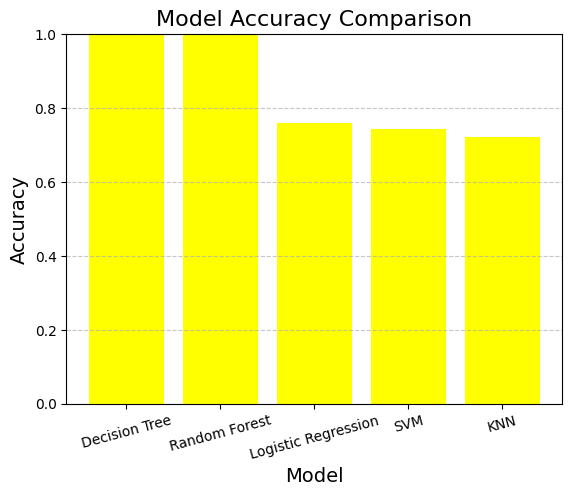

In [ ]:
# Display results in a bar chart
import matplotlib.pyplot as plt

results = dict(sorted(results.items(), key=lambda item: item[1], reverse=True))
plt.bar(results.keys(), results.values(), color='Yellow')
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0, 1)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
  import pandas as pd
from google.colab import drive

In [ ]:
 # Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Shuffle the dataset
df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
 # Take only 500 rows
df_small = df_shuffled.head(500)

In [ ]:
 # Save to Drive
df_small.to_csv('/content/drive/MyDrive/Colab Notebooks/ML_Lab_Record/data/Security.csv', index=False)